# EDA - Inventory control using online shopping intention

In [1]:
# Team MARVEL

# Importing the libraries and files


In [1]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore")

In [3]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import collections
from collections import defaultdict
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from IPython.display import display
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR

pd.set_option('display.max_columns', 300) # to display all the columns
pd.set_option('display.max_rows', 300) # to display all the rows
pd.set_option('display.width', 1000)


# Reading & Inspection of the data 

In [4]:
application_data = pd.read_excel(r'online_retail_II.xlsx')
application_data["Unique Invoice Stockcode"]=application_data["Invoice"].astype(str)+ application_data["StockCode"].astype(str)
application_data


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Unique Invoice Stockcode
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,48943485048
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,48943479323P
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,48943479323W
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,48943422041
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,48943421232
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,53817122271
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,53817122750
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,53817122751
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,53817120970


In [5]:
previous_data = pd.read_excel(r'online_retail_II.xlsx')
previous_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [6]:
application_data.head(5)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Unique Invoice Stockcode
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,48943485048
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,48943479323P
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,48943479323W
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,48943422041
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,48943421232


- ###  : Inspect the Dataframe - Application_data (New application) 

Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [7]:
# Check the number of rows and columns in the dataframe
print("Dataset shape")
print("----------------------------------")
print(application_data.shape)
print("----------------------------------")

Dataset shape
----------------------------------
(525461, 9)
----------------------------------


In [8]:
# Check the column-wise info of the dataframe

#print("Column-wise info of the dataframe")
print(application_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Invoice                   525461 non-null  object        
 1   StockCode                 525461 non-null  object        
 2   Description               522533 non-null  object        
 3   Quantity                  525461 non-null  int64         
 4   InvoiceDate               525461 non-null  datetime64[ns]
 5   Price                     525461 non-null  float64       
 6   Customer ID               417534 non-null  float64       
 7   Country                   525461 non-null  object        
 8   Unique Invoice Stockcode  525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 36.1+ MB
None


In [9]:
#Looking unique values
print("Unique Values of each field in the dataset")
print("------------------------------------------")
print(application_data.nunique())
print("------------------------------------------")


Unique Values of each field in the dataset
------------------------------------------
Invoice                      28816
StockCode                     4632
Description                   4681
Quantity                       825
InvoiceDate                  25296
Price                         1606
Customer ID                   4383
Country                         40
Unique Invoice Stockcode    512126
dtype: int64
------------------------------------------


In [10]:
# Get a summary of the dataframe using 'describe()'
print("           Summary of the dataset")
print("---------------------------------------------------")
print(application_data.describe())
print("---------------------------------------------------")

           Summary of the dataset
---------------------------------------------------
            Quantity          Price    Customer ID
count  525461.000000  525461.000000  417534.000000
mean       10.337667       4.688834   15360.645478
std       107.424110     146.126914    1680.811316
min     -9600.000000  -53594.360000   12346.000000
25%         1.000000       1.250000   13983.000000
50%         3.000000       2.100000   15311.000000
75%        10.000000       4.210000   16799.000000
max     19152.000000   25111.090000   18287.000000
---------------------------------------------------


In [11]:
print("Columns in the dataset")
print("-----------------------")
print(application_data.columns)
print("-----------------------")

Columns in the dataset
-----------------------
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Unique Invoice Stockcode'], dtype='object')
-----------------------


In [12]:
#checking data type of each column
print("Data types of each column in the dataset")
print("------------------------------------------")
print(application_data.dtypes)
print("------------------------------------------")

Data types of each column in the dataset
------------------------------------------
Invoice                             object
StockCode                           object
Description                         object
Quantity                             int64
InvoiceDate                 datetime64[ns]
Price                              float64
Customer ID                        float64
Country                             object
Unique Invoice Stockcode            object
dtype: object
------------------------------------------


## : Cleaning the Data
### Subtask 2.1: Inspect Null values

#Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column. 


In [13]:
# Get the column-wise Null count using 'is.null()' alongwith the 'sum()' function
print("Column-wise Null count")
print("----------------------------------")
print(application_data.isnull().sum())
print("----------------------------------")

Column-wise Null count
----------------------------------
Invoice                          0
StockCode                        0
Description                   2928
Quantity                         0
InvoiceDate                      0
Price                            0
Customer ID                 107927
Country                          0
Unique Invoice Stockcode         0
dtype: int64
----------------------------------


In [14]:
# Checking the columns having less null percentage
print("Column-wise Null percentage count")
print("-------------------------------------")
print(application_data.isnull().sum()/len(application_data) * 100)
print("-------------------------------------")

Column-wise Null percentage count
-------------------------------------
Invoice                      0.000000
StockCode                    0.000000
Description                  0.557225
Quantity                     0.000000
InvoiceDate                  0.000000
Price                        0.000000
Customer ID                 20.539488
Country                      0.000000
Unique Invoice Stockcode     0.000000
dtype: float64
-------------------------------------


In [15]:
# Get the row-wise Null count the same way. 

application_data.info(verbose = True, null_counts = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Invoice                   525461 non-null  object        
 1   StockCode                 525461 non-null  object        
 2   Description               522533 non-null  object        
 3   Quantity                  525461 non-null  int64         
 4   InvoiceDate               525461 non-null  datetime64[ns]
 5   Price                     525461 non-null  float64       
 6   Customer ID               417534 non-null  float64       
 7   Country                   525461 non-null  object        
 8   Unique Invoice Stockcode  525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 36.1+ MB


#  - Missing Value Treatment

In [16]:
# Removing all the columns with more than 15% nulls values/Keeping all of them with <= 15% null values
New_application_data = application_data.loc[:,application_data.isnull().mean() <= 0.15]
New_application_data


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,Unique Invoice Stockcode
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom,48943485048
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,48943479323P
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,48943479323W
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom,48943422041
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom,48943421232
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,United Kingdom,53817122271
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,United Kingdom,53817122750
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,United Kingdom,53817122751
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,United Kingdom,53817120970


In [17]:
New_application_data.shape

(525461, 8)

# One More Step for Removing the unwanted columns from this dataset 

In [18]:
New_application_data.shape

(525461, 8)

In [19]:
# counting the number of rows which has more than 50% columns have missing value
print("Columns having more than 50 percentage Null values")
print("---------------------------------------------------")
print(len(New_application_data[New_application_data.isnull().sum(axis = 1) > len(New_application_data.columns) //2].index))
print("---------------------------------------------------")


Columns having more than 50 percentage Null values
---------------------------------------------------
0
---------------------------------------------------


We also check for the rows Item wise and analyse how many products were sold for each item.


In [20]:
print("Number Of times the products were sold")
print("------------------------------------------")
print(New_application_data['Description'].value_counts())
print("------------------------------------------")


Number Of times the products were sold
------------------------------------------
WHITE HANGING HEART T-LIGHT HOLDER     3549
REGENCY CAKESTAND 3 TIER               2212
STRAWBERRY CERAMIC TRINKET BOX         1843
PACK OF 72 RETRO SPOT CAKE CASES       1466
ASSORTED COLOUR BIRD ORNAMENT          1457
                                       ... 
stock credited from royal yacht inc       1
VINTAGE METAL CAKE STAND CREAM            1
BLUE BAROQUE FLOCK CANDLE HOLDER          1
S/4 HEART CRYSTAL FRIDGE MAGNETS          1
dotcom email                              1
Name: Description, Length: 4681, dtype: int64
------------------------------------------


# :- Checking for values to impute in columns

In [21]:
print("Dropping the rows where Product Description is Null")
print("---------------------------------------------------")
New_application_data = New_application_data.dropna(subset=['Description'])
print(New_application_data.isnull().sum())
print("---------------------------------------------------")

Dropping the rows where Product Description is Null
---------------------------------------------------
Invoice                     0
StockCode                   0
Description                 0
Quantity                    0
InvoiceDate                 0
Price                       0
Country                     0
Unique Invoice Stockcode    0
dtype: int64
---------------------------------------------------


In [22]:
# Removing the rows which are having negative values as Price and Quantity cannot have negative values

New_application_data = New_application_data.drop(New_application_data.index[New_application_data['Price'] <= 0])
New_application_data = New_application_data.drop(New_application_data.index[New_application_data['Quantity'] <= 0])
round(New_application_data[['Price', 'Quantity']].describe(), 2)


,Price,Quantity
count,511566.00,511566.00
mean,4.25,11.40
std,63.66,86.76
min,0.00,1.00
25%,1.25,1.00
50%,2.10,3.00
75%,4.21,10.00
max,25111.09,19152.00


In [23]:
New_application_data.shape

(511566, 8)

In [24]:
# Grouping the dataframe based on the items and getting the most sold items
print("Group the dataset by Items")
print("------------------------------------------")
Items = New_application_data.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False)
print(Items)
print("------------------------------------------")

Group the dataset by Items
------------------------------------------
Description
WHITE HANGING HEART T-LIGHT HOLDER    58792
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55091
BROCADE RING PURSE                    48374
PACK OF 72 RETRO SPOT CAKE CASES      46755
ASSORTED COLOUR BIRD ORNAMENT         45348
                                      ...  
AMETHYST 3 BEAD DROP EARRINGS             1
BISCUIT TIN, MINT,IVORY, VINTAGE          1
S/2 HYACINTH BULB CANDLES                 1
6 HOOK JEWEL STAND LILAC DRESS            1
ENGLISH ROSE DESIGN SHOPPING BAG          1
Name: Quantity, Length: 4534, dtype: int64
------------------------------------------


In [25]:
#Items whose quantity is less than 10 are extracted 

Items_Removed = Items[Items <= 20]
list_items_removed = list(Items_Removed.index.values)

In [26]:
New_application_data.shape

(511566, 8)

#    Data Transformation

In [27]:
print("Creating the matrix for MBA")
print("  ")
matrix_dat = New_application_data[['Invoice', 'Description']].to_numpy()
print(matrix_dat)

Creating the matrix for MBA
  
[[489434 '15CM CHRISTMAS GLASS BALL 20 LIGHTS']
 [489434 'PINK CHERRY LIGHTS']
 [489434 ' WHITE CHERRY LIGHTS']
 ...
 [538171 'FELTCRAFT PRINCESS OLIVIA DOLL']
 [538171 'PINK FLORAL FELTCRAFT SHOULDER BAG']
 [538171 'JUMBO STORAGE BAG SUKI']]


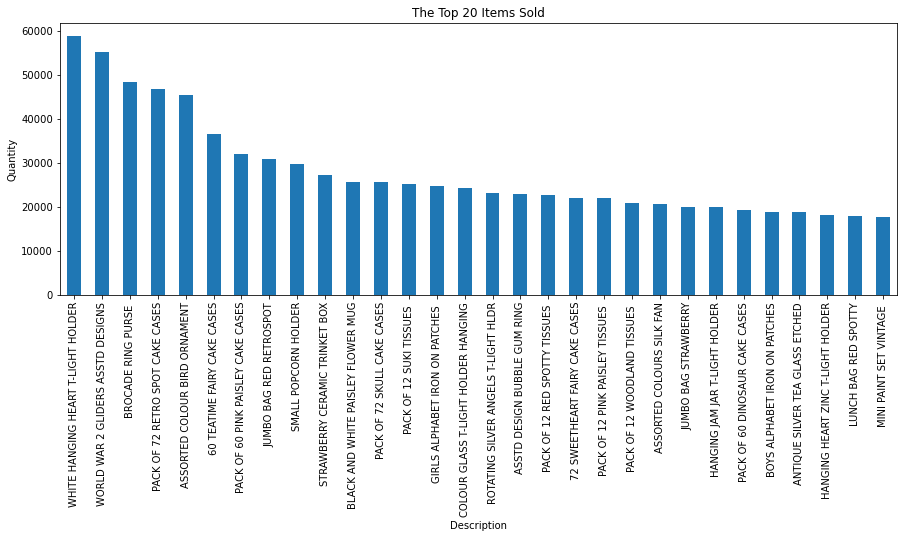

In [28]:
# Plotting the Top 20 items sold

import matplotlib.pyplot as plt
sortd = New_application_data.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False)[:30].plot(kind='bar', figsize=(15,5))
plt.ylabel("Quantity")
plt.title("The Top 20 Items Sold")
#plt.xticks(rotation = 45)
plt.show()

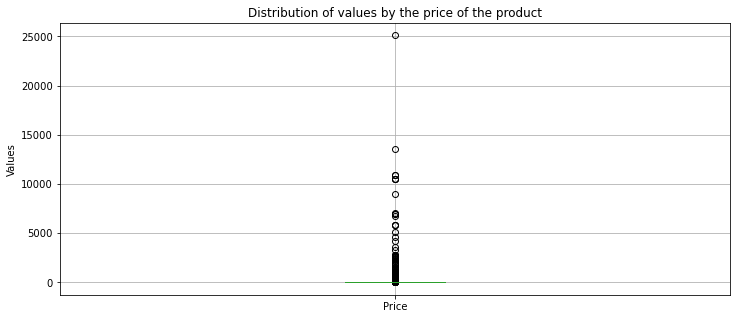

In [29]:
# Plotting PRICE to show outliers

plt.figure(figsize=(12,5))
ax = New_application_data.boxplot(column='Price')
plt.title('Distribution of values by the price of the product')
ax.set_ylabel('Values')
plt.show()


In [30]:
g = New_application_data.groupby('Invoice').cumcount()
mux = pd.MultiIndex.from_product([New_application_data['Invoice'].unique(), g.unique()])
L = (New_application_data.set_index(['Invoice',g])
       .reindex(mux, fill_value=0)
       .groupby(level=0)['Description']
       .apply(lambda x: x.values.tolist())
       .tolist()
)
print("Creating a list of items under every Invoice")

Creating a list of items under every Invoice


In [31]:
# Creating a dictionary with the key being the invoices and the value being a list of all the items 
# purchased as part of the invoice

k = 0
dict1 = {}
for invoice_no in New_application_data['Invoice'].unique():
    k = k + 1
    if k < 6:
        df1 = New_application_data[New_application_data['Invoice']== invoice_no]
        idx = df1[['Description']].set_index('Description')
        list1 = idx.index.values.tolist()
        dict1[invoice_no] = list1
print(dict1)

{489434: ['15CM CHRISTMAS GLASS BALL 20 LIGHTS', 'PINK CHERRY LIGHTS', ' WHITE CHERRY LIGHTS', 'RECORD FRAME 7" SINGLE SIZE ', 'STRAWBERRY CERAMIC TRINKET BOX', 'PINK DOUGHNUT TRINKET POT ', 'SAVE THE PLANET MUG', 'FANCY FONT HOME SWEET HOME DOORMAT'], 489435: ['CAT BOWL ', 'DOG BOWL , CHASING BALL DESIGN', 'HEART MEASURING SPOONS LARGE', 'LUNCHBOX WITH CUTLERY FAIRY CAKES '], 489436: ['DOOR MAT BLACK FLOCK ', 'LOVE BUILDING BLOCK WORD', 'HOME BUILDING BLOCK WORD', 'ASSORTED COLOUR BIRD ORNAMENT', ' PEACE WOODEN BLOCK LETTERS', 'CHRISTMAS CRAFT WHITE FAIRY ', 'HEART IVORY TRELLIS LARGE', 'HEART FILIGREE DOVE LARGE', 'FULL ENGLISH BREAKFAST PLATE', 'PIZZA PLATE IN BOX', 'BLACK DINER WALL CLOCK', 'SET OF 3 BLACK FLYING DUCKS', 'AREA PATROLLED METAL SIGN', 'PLEASE ONE PERSON  METAL SIGN', 'BATH BUILDING BLOCK WORD', 'CLASSIC WHITE FRAME', 'SMALL MARSHMALLOWS PINK BOWL', 'BISCUITS SMALL BOWL LIGHT BLUE', 'SCOTTIE DOG HOT WATER BOTTLE'], 489437: ['CHRISTMAS CRAFT HEART DECORATIONS', 'CHRIST

# Creating a dataframe with the invoices being the rows and the items being the individual columns

In [32]:
# Creating a dictionary with Invoice as key and the items under the invoive as values in the form of a list

k = 0
dict1 = {}
for invoice_no in New_application_data['Invoice'].unique():
        df1 = New_application_data[New_application_data['Invoice']== invoice_no]
        idx = df1[['Description']].set_index('Description')
        list1 = idx.index.values.tolist()
        dict1[invoice_no] = list1
print("Data Transformation completed Successfully")


Data Transformation completed Successfully


In [33]:
# Formatting the Invoice Date in the form of a date and not a timestamp
New_application_data["InvoiceDate without time"] = New_application_data['InvoiceDate'].astype(str).str[:10]
New_application_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Country,Unique Invoice Stockcode,InvoiceDate without time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,United Kingdom,48943485048,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,48943479323P,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,United Kingdom,48943479323W,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,United Kingdom,48943422041,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,United Kingdom,48943421232,2009-12-01
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,United Kingdom,53817122271,2010-12-09
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,United Kingdom,53817122750,2010-12-09
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,United Kingdom,53817122751,2010-12-09
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,United Kingdom,53817120970,2010-12-09


In [34]:
# Extracting the quantities sold monthly
m=[]
for i in range(1,10):
    m1=New_application_data.loc[New_application_data["InvoiceDate without time"].str[8:10]=='0'+str(i),'Quantity'].sum()
    m.append(m1)
m1=New_application_data.loc[New_application_data["InvoiceDate without time"].str[8:10]=='10','Quantity'].sum()
m.append(m1)
m1=New_application_data.loc[New_application_data["InvoiceDate without time"].str[8:10]=='11','Quantity'].sum()
m.append(m1)
m1=New_application_data.loc[New_application_data["InvoiceDate without time"].str[8:10]=='12','Quantity'].sum()
m.append(m1)
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [35]:
df = pd.DataFrame({'months':months,'Quantity':m})
print("Monthly Sales")
print("-------------------")
print(df)
print("-------------------")

Monthly Sales
-------------------
   months  Quantity
0     Jan    185124
1     Feb    171539
2     Mar    205513
3     Apr    184088
4     May    175458
5     Jun    159386
6     Jul    261808
7     Aug    240113
8     Sep    270860
9     Oct    162747
10    Nov    183517
11    Dec    164891
-------------------


# Creating Heatmap

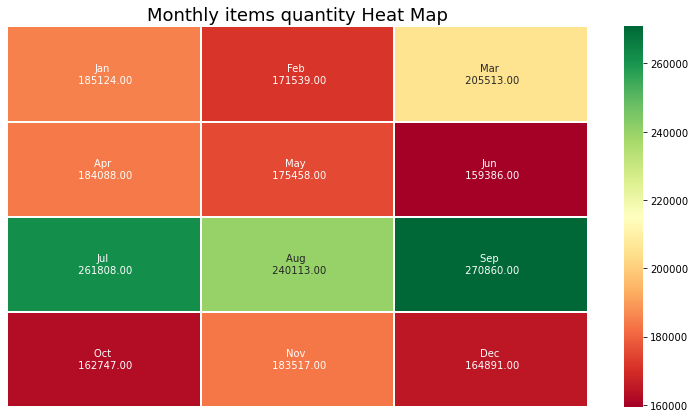

In [36]:
symbol = ((np.asarray(df['months'])).reshape(4,3))
quantity = ((np.asarray(df['Quantity'])).reshape(4,3))

# # Create a pivot table
result = df.pivot_table(index=['months'],values=['Quantity'])

# Create an array to annotate the heatmap
labels = (np.asarray(["{0} \n {1:.2f}".format(symb,value)
                      for symb, value in zip(symbol.flatten(),
                                               quantity.flatten())])).reshape(4,3)

# Define the plot
fig, ax = plt.subplots(figsize=(13,7))

# Add title to the Heat map
title = "Monthly items quantity Heat Map"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])

# Hide ticks for X & Y axis
ax.set_xticks([])
ax.set_yticks([])

# Remove the axes
ax.axis('off')

# Use the heatmap function from the seaborn package
sns.heatmap(quantity,annot=labels,fmt="",cmap='RdYlGn',linewidths=0.30,ax=ax)

# Display the Pharma Sector Heatmap
plt.show()

In [37]:
# Flagging the items as 1 which are present in an invoice from the list of all the items

Invoice_list = application_data.Invoice.values.tolist()
Invoice_list = list(set(Invoice_list))

Description_list = application_data.Description.values.tolist()
Description_list = list(set(Description_list))

df_matrix = pd.DataFrame(columns = Description_list)
df_matrix['Invoice'] = Invoice_list
df_matrix = df_matrix.set_index('Invoice')

j = 0

for k,v in dict1.items():
    if j < 100:
        for i in v:
            k = str(k)
            df_matrix.loc[k,i] = 1
            j = j + 1
    else:
        break                 

In [38]:
# Minimum support threshold
min_support = 0.3
itemsets = []

dict_list = [value for value in dict1.values()]
dict1_list = dict_list[0:2]

# Function to calculate support of an itemset
def calculate_support(itemset, dict1_list):
    count = 0
    for transaction in dict1_list:
        if set(itemset).issubset(set(transaction)):
            count += 1
    support = count / len(dict1_list)
    return support

# Get unique items in transactions
unique_items = set(item for transaction in dict1_list for item in transaction)


# Generate all possible itemsets
itemsets = []
for item in unique_items:
    itemsets.append([item])
for i in range(2, len(unique_items)+1):
    itemsets += list(itertools.combinations(unique_items, i))

# Calculate support of each itemset
itemset_support = {}
for itemset in itemsets:
    support = calculate_support(itemset, dict1_list)
    if support >= min_support:
        itemset_support[tuple(sorted(itemset))] = support

# Grouping the items under invoice in the form of itemsets

print("Itemsets")
print("---------")
print(itemsets[0:100])


Itemsets
---------
[['DOG BOWL , CHASING BALL DESIGN'], ['15CM CHRISTMAS GLASS BALL 20 LIGHTS'], ['PINK DOUGHNUT TRINKET POT '], ['RECORD FRAME 7" SINGLE SIZE '], ['PINK CHERRY LIGHTS'], ['HEART MEASURING SPOONS LARGE'], ['FANCY FONT HOME SWEET HOME DOORMAT'], ['LUNCHBOX WITH CUTLERY FAIRY CAKES '], ['CAT BOWL '], [' WHITE CHERRY LIGHTS'], ['STRAWBERRY CERAMIC TRINKET BOX'], ['SAVE THE PLANET MUG'], ('DOG BOWL , CHASING BALL DESIGN', '15CM CHRISTMAS GLASS BALL 20 LIGHTS'), ('DOG BOWL , CHASING BALL DESIGN', 'PINK DOUGHNUT TRINKET POT '), ('DOG BOWL , CHASING BALL DESIGN', 'RECORD FRAME 7" SINGLE SIZE '), ('DOG BOWL , CHASING BALL DESIGN', 'PINK CHERRY LIGHTS'), ('DOG BOWL , CHASING BALL DESIGN', 'HEART MEASURING SPOONS LARGE'), ('DOG BOWL , CHASING BALL DESIGN', 'FANCY FONT HOME SWEET HOME DOORMAT'), ('DOG BOWL , CHASING BALL DESIGN', 'LUNCHBOX WITH CUTLERY FAIRY CAKES '), ('DOG BOWL , CHASING BALL DESIGN', 'CAT BOWL '), ('DOG BOWL , CHASING BALL DESIGN', ' WHITE CHERRY LIGHTS'), ('DOG

# Feature 1 : MARKET BASKET ANALYSIS

In [39]:
#APRIORI ALGORITHM model for Market Basket Analysis

dict_list = [value for value in dict1.values()]

# Transform transactions into a transactional database
te = TransactionEncoder()
te_ary = te.fit(dict_list).transform(dict_list)
df = pd.DataFrame(te_ary, columns = te.columns_)


# Generate frequent itemsets
frequent_itemsets = apriori(df, min_support = 0.03, use_colnames = True)
# print(frequent_itemsets)

# Generate association rules
rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.2)
rules['MBA Value(%)'] = rules['confidence'] * 100
#top confidence val
rules = rules.sort_values(['confidence'], ascending=False)
# Print association rules

print("---------------------------------------------------------------------------------------------------------------------------")
print("                                              MARKET BASKET ANALYSIS - Apriori ")
print("---------------------------------------------------------------------------------------------------------------------------")
display(rules)
print(" ")
print("---------------------------------------------------------------------------------------------------------------------------")
print(" ")
print("                                              Table : 1.1 ")



---------------------------------------------------------------------------------------------------------------------------
                                              MARKET BASKET ANALYSIS - Apriori 
---------------------------------------------------------------------------------------------------------------------------


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,MBA Value(%)
2,(SWEETHEART CERAMIC TRINKET BOX),(STRAWBERRY CERAMIC TRINKET BOX),0.047776,0.078274,0.037992,0.795205,10.159226,0.034252,4.500720,0.946802,79.520480
1,(RED HANGING HEART T-LIGHT HOLDER),(WHITE HANGING HEART T-LIGHT HOLDER),0.050878,0.158219,0.036798,0.723265,4.571294,0.028749,3.041826,0.823123,72.326454
3,(STRAWBERRY CERAMIC TRINKET BOX),(SWEETHEART CERAMIC TRINKET BOX),0.078274,0.047776,0.037992,0.485366,10.159226,0.034252,1.850293,0.978130,48.536585
0,(WHITE HANGING HEART T-LIGHT HOLDER),(RED HANGING HEART T-LIGHT HOLDER),0.158219,0.050878,0.036798,0.232579,4.571294,0.028749,1.236768,0.928084,23.257919


 
---------------------------------------------------------------------------------------------------------------------------
 
                                              Table : 1.1 


In [40]:
#FP GROWTH ALGORITHM FOR MARKET BASKET ANALYSIS

# instantiate a transaction encoder
my_transactionencoder = TransactionEncoder()

# fit the transaction encoder using the list of transaction tuples
my_transactionencoder.fit(itemsets)

# transform the list of transaction tuples into an array of encoded transactions
encoded_transactions = my_transactionencoder.transform(itemsets)

# convert the array of encoded transactions into a dataframe
encoded_transactions_df = pd.DataFrame(encoded_transactions, columns=my_transactionencoder.columns_)
encoded_transactions_df

# our min support is 7, but it has to be expressed as a percentage for mlxtend
min_support = 7/len(itemsets)

# compute the frequent itemsets using fpgriowth from mlxtend
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
frequent_itemsets = fpgrowth(encoded_transactions_df, min_support=min_support, use_colnames = True)

# print the frequent itemsets
#frequent_itemsets

# Compute the association rules based on the frequent itemsets

# compute and print the association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)
rules = rules.sort_values(['confidence'], ascending=False)

# Print top 10 rules

print("---------------------------------------------------------------------------------------------------------------------------")
print("                                              MARKET BASKET ANALYSIS - FP Growth ")
print("---------------------------------------------------------------------------------------------------------------------------")
display(rules.head(10))
print(" ")
print("---------------------------------------------------------------------------------------------------------------------------")
print(" ")
print("                                              Table : 1.2 ")


---------------------------------------------------------------------------------------------------------------------------
                                              MARKET BASKET ANALYSIS - FP Growth 
---------------------------------------------------------------------------------------------------------------------------


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(DOG BOWL , CHASING BALL DESIGN)",(PINK DOUGHNUT TRINKET POT ),0.500122,0.500122,0.250061,0.5,0.999756,-0.000061,0.999756,-0.000488
39180,"(DOG BOWL , CHASING BALL DESIGN, 15CM CHRISTMA...",( WHITE CHERRY LIGHTS),0.015629,0.500122,0.007814,0.5,0.999756,-0.000002,0.999756,-0.000248
39107,"(DOG BOWL , CHASING BALL DESIGN, PINK DOUGHNUT...",(15CM CHRISTMAS GLASS BALL 20 LIGHTS),0.031258,0.500122,0.015629,0.5,0.999756,-0.000004,0.999756,-0.000252
39108,"(15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK DOU...","(DOG BOWL , CHASING BALL DESIGN)",0.031258,0.500122,0.015629,0.5,0.999756,-0.000004,0.999756,-0.000252
39124,"(DOG BOWL , CHASING BALL DESIGN, 15CM CHRISTMA...",( WHITE CHERRY LIGHTS),0.015629,0.500122,0.007814,0.5,0.999756,-0.000002,0.999756,-0.000248
39125,"(DOG BOWL , CHASING BALL DESIGN, 15CM CHRISTMA...",(HEART MEASURING SPOONS LARGE),0.015629,0.500122,0.007814,0.5,0.999756,-0.000002,0.999756,-0.000248
39126,"(DOG BOWL , CHASING BALL DESIGN, 15CM CHRISTMA...",(PINK CHERRY LIGHTS),0.015629,0.500122,0.007814,0.5,0.999756,-0.000002,0.999756,-0.000248
39127,"(DOG BOWL , CHASING BALL DESIGN, 15CM CHRISTMA...","(RECORD FRAME 7"" SINGLE SIZE )",0.015629,0.500122,0.007814,0.5,0.999756,-0.000002,0.999756,-0.000248
39128,"(DOG BOWL , CHASING BALL DESIGN, 15CM CHRISTMA...",(PINK DOUGHNUT TRINKET POT ),0.015629,0.500122,0.007814,0.5,0.999756,-0.000002,0.999756,-0.000248
39129,"(DOG BOWL , CHASING BALL DESIGN, PINK DOUGHNUT...",(15CM CHRISTMAS GLASS BALL 20 LIGHTS),0.015629,0.500122,0.007814,0.5,0.999756,-0.000002,0.999756,-0.000248


 
---------------------------------------------------------------------------------------------------------------------------
 
                                              Table : 1.2 


In [41]:
#Creating multiple backups of the input dataframe to use it later 
New_application_data_copy = New_application_data.copy(deep = False)
New_application_data_copy1 = New_application_data.copy(deep = False)
New_application_data_copy2 = New_application_data.copy(deep = False)
New_application_data_copy3 = New_application_data.copy(deep = False)
New_application_data_copy4 = New_application_data.copy(deep = False)
New_application_data_copy5 = New_application_data.copy(deep = False)
New_application_data_copy6 = New_application_data.copy(deep = False)
New_application_data_copy7 = New_application_data.copy(deep = False)
New_application_data_copy8 = New_application_data.copy(deep = False)
New_application_data_copy9 = New_application_data.copy(deep = False)
New_application_data_copy11 = New_application_data.copy(deep = False)

# Feature 2 : CUSTOMER SEGMENTATION

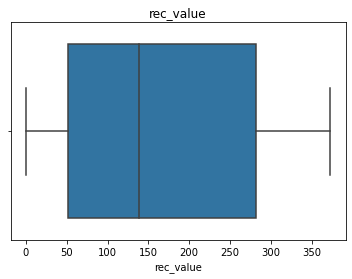

                              Figure 2. 1
   


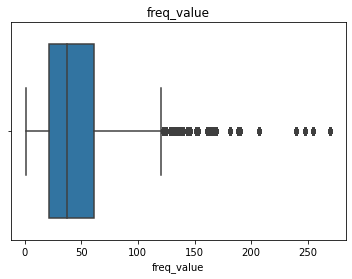

                              Figure 2. 2
   


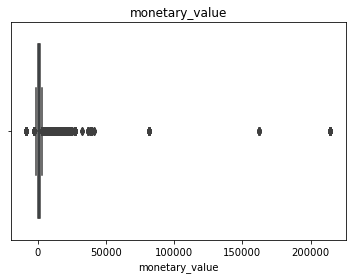

                              Figure 2. 3
   


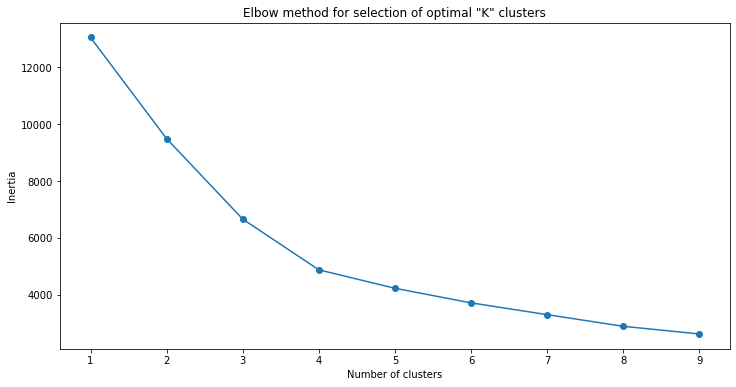

                                                      Figure 2.4 
      
Silhoutte score :  0.4213950701350386
      


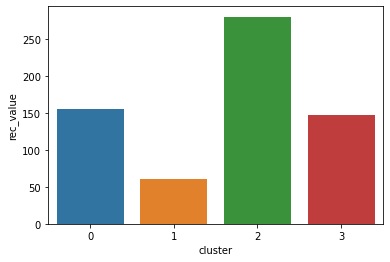

                         Figure : 2. 5


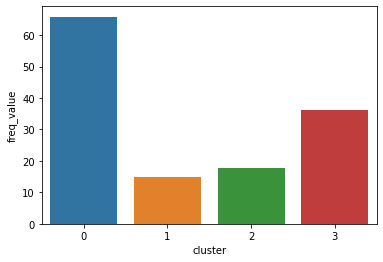

                         Figure : 2. 6


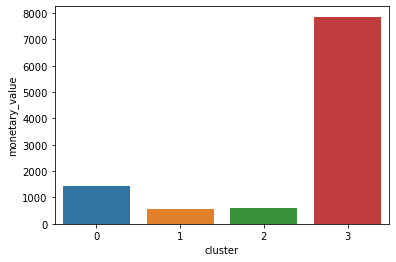

                         Figure : 2. 7


In [42]:

df = application_data.copy(deep = False)
df.rename(columns = {'Customer ID':'CustomerID'}, inplace = True)

# convert date column to datetime format
df['Date']= pd.to_datetime(df['InvoiceDate'])
# keeping only the most recent date of purchase
df['rank'] = df.sort_values(['CustomerID','Date']).groupby(['CustomerID'])['Date'].rank(method='min').astype(int)
df_rec = df[df['rank']==1]
# Calculating the Recency for RFM
df_rec['rec_value'] = (df_rec['InvoiceDate'] - pd.to_datetime(min(df_rec['Date']))).dt.days
#Calculating the Frequency for RFM 
freq = df_rec.groupby('CustomerID')['InvoiceDate'].count()
df_freq = pd.DataFrame(freq).reset_index()
df_freq.columns = ['CustomerID','freq_value']
# How often customers buy
rec_freq = df_freq.merge(df_rec,on='CustomerID')
# Monetary value - How much money customers spend
rec_freq['total'] = rec_freq['Quantity']*df['Price']
m = rec_freq.groupby('CustomerID')['total'].sum()
m = pd.DataFrame(m).reset_index()
m.columns = ['CustomerID','monetary_value']
#RFM value 
RFM = m.merge(rec_freq,on='CustomerID')
# Dataframe containing RFM values
finaldf = RFM[['CustomerID','rec_value','freq_value','monetary_value']]

listA = ['rec_value','freq_value','monetary_value']
count = 1
for i in listA:
    #print(str(i)+': ')
    ax = sns.boxplot(x=finaldf[str(i)])
    plt.title(i)
    plt.show()
    print("                              Figure 2.", count)
    print("   ")
    count = count + 1

df_new = finaldf[['rec_value','freq_value','monetary_value']]

# Removing outliers
Z_Value = stats.zscore(df_new)
abs_Z_Value = np.abs(Z_Value)
filtered_entries = (abs_Z_Value < 3).all(axis=1)
df_new = df_new[filtered_entries]
df_new = df_new.drop_duplicates()

# Evaluating characteristics of an ideal customer using RFM
col_names = ['rec_value', 'freq_value', 'monetary_value']
featurevalue = df_new[col_names]
scaler = StandardScaler().fit(featurevalue.values)
featurevalue = scaler.transform(featurevalue.values)
scaled_featurevalue = pd.DataFrame(featurevalue, columns = col_names)

SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_featurevalue)
    SSE.append(kmeans.inertia_)
    
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for selection of optimal "K" clusters')
plt.show()
print("                                                      Figure 2.4 ")

# k = 4 as the elbow starts to flatten from 4
# Building a model with 4 clusters
kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(scaled_featurevalue)
#Calculating the silhouette score
print("      ")
print("Silhoutte score : ",silhouette_score(scaled_featurevalue, kmeans.labels_, metric='euclidean'))
print("      ")

predicted_result = kmeans.predict(scaled_featurevalue)
frame = pd.DataFrame(df_new)
frame['cluster'] = predicted_result

#Plotting the clusters with respect to the RFM values
avg_df = frame.groupby(['cluster'], as_index=False).mean()
count = 5
for i in listA:
    sns.barplot(x='cluster',y=str(i),data=avg_df)
    plt.show()
    print("                         Figure : 2.", count)
    count = count + 1

In [97]:
import plotly.graph_objects as go
New_application_data_12 = New_application_data_copy.groupby('Invoice').sum('Price')

New_application_data_12.head()

kmeans_model = KMeans(init='k-means++',  max_iter=400, random_state=42)
kmeans_model.fit(New_application_data_12[['Quantity','Price']])

def try_different_clusters(K, data):

    cluster_values = list(range(1, K+1))
    inertias=[]

    for c in cluster_values:
        model = KMeans(n_clusters = c,init = 'k-means++',max_iter = 400,random_state = 42)
        model.fit(data)
        inertias.append(model.inertia_)

    return inertias

outputs = try_different_clusters(12, New_application_data_12[['Quantity','Price']])
distances = pd.DataFrame({"clusters": list(range(1, 13)),"sum of squared distances": outputs})


In [111]:
import plotly.express as px

import plotly.offline as pyo
import plotly.graph_objs as go
kmeans_model_new = KMeans(n_clusters = 5,init='k-means++',max_iter=400,random_state=42)

kmeans_model_new.fit_predict(New_application_data_12[['Quantity','Price']])

cluster_centers = kmeans_model_new.cluster_centers_
data = np.expm1(cluster_centers)
points = np.append(data, cluster_centers, axis=1)
points

# Add "clusters" to customers data
points = np.append(points, [[0], [1], [2], [3], [4]], axis=1)
New_application_data_12["clusters"] = kmeans_model_new.labels_


figure = px.scatter(New_application_data_12,
                    color='clusters',
                    x = "Price",
                    y = "Quantity",
                    category_orders = {"clusters": ["0", "1", "2", "3", "4"]}
                    )
figure.update_layout(title_text='Customer Segmentation')
figure.show()
pyo.iplot(figure,filename='Feature 2 clusters')
# plt.scatter(New_application_data_12,{"clusters": ["0", "1", "2", "3", "4"]})
# plt.legend()
# plt.show()


print("                                                     Figure 2.8")


C:\Users\arjun\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\arjun\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



C:\Users\arjun\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\arjun\anaconda3\lib\site-packages\plotly\io\_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



                                                     Figure 2.8


# Feature 3 : DEMAND FORECAST

In [45]:
# Grouping the items quantities based on Invoice date

New_application_data_copy5 = New_application_data.copy(deep = False)
New_application_data_copy['InvoiceDate'] = New_application_data_copy['InvoiceDate'].dt.strftime('%Y-%m-%d')
New_application_data_2 = New_application_data_copy.groupby('InvoiceDate').sum('Quantity')
New_application_data_2.index = pd.to_datetime(New_application_data_2.index)
New_application_data_2 = New_application_data_2.drop(['Price'], axis=1)
New_application_data_2.head()


,Quantity
InvoiceDate,
2009-12-01,26204
2009-12-02,31896
2009-12-03,49243
2009-12-04,21325
2009-12-05,5119


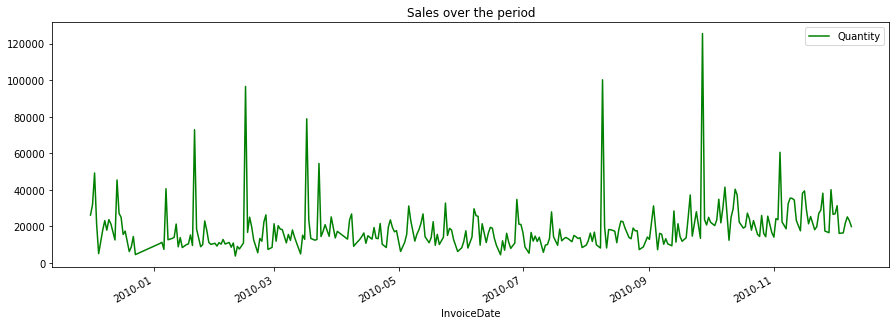

                                                             Figure 3. 1


In [47]:
count3=1
New_application_data_2.plot(
        # style='.',
        figsize = (15, 5),
        color = 'green',
        title = 'Sales over the period')
plt.show()
print("                                                             Figure 3.",count3)
count3=count3+1

In [51]:
train = New_application_data_2.loc[New_application_data_2.index < '10-01-2011']
test = New_application_data_2.loc[New_application_data_2.index >= '10-01-2011']

train2 = New_application_data_2.loc[New_application_data_2.index < '10-01-2011']
test2 = New_application_data_2.loc[New_application_data_2.index >= '10-01-2011']



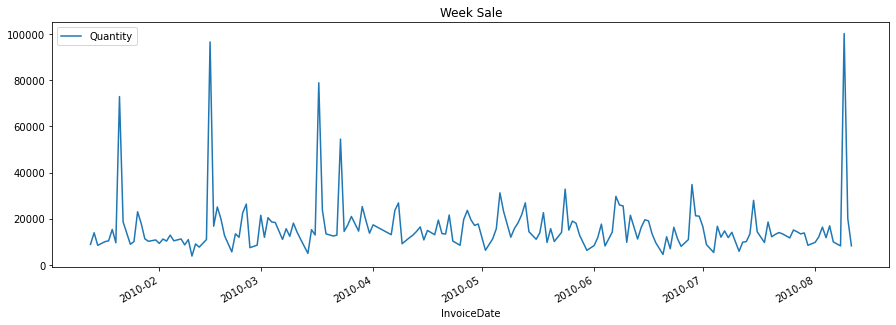

                                                             Figure 3. 20


In [76]:
New_application_data_2.loc[(New_application_data_2.index > '01-12-2010') & (New_application_data_2.index < '08-12-2010')] \
    .plot(figsize = (15, 5), title = 'Week Sale')
plt.show()
print("                                                             Figure 3.",count3)
count3=count3+1

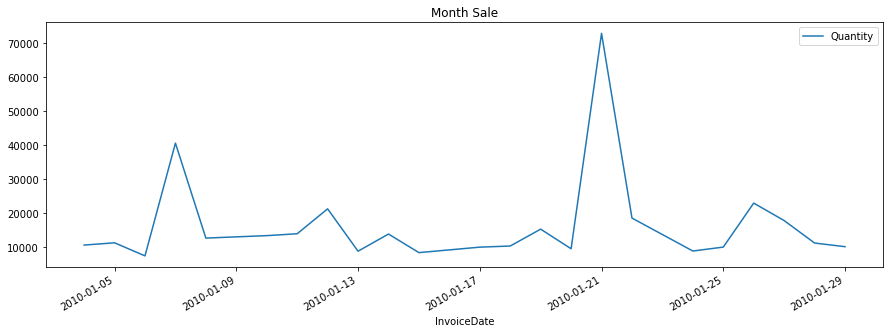

                                                             Figure 3. 21


In [77]:
New_application_data_2.loc[(New_application_data_2.index > '01-01-2010') & (New_application_data_2.index < '01-31-2010')] \
    .plot(figsize = (15, 5), title = 'Month Sale')
plt.show()
print("                                                             Figure 3.",count3)
count3=count3+1

In [78]:
def create_features(New_application_data_2):
    """
    Creating time series features based on dataframe index.
    """
    New_application_data_2_copy = New_application_data_2.copy()
    New_application_data_2_copy['dayofweek'] = New_application_data_2_copy.index.dayofweek
    New_application_data_2_copy['quarter'] = New_application_data_2_copy.index.quarter
    New_application_data_2_copy['month'] = New_application_data_2_copy.index.month
    New_application_data_2_copy['dayofyear'] = New_application_data_2_copy.index.dayofyear
    New_application_data_2_copy['dayofmonth'] = New_application_data_2_copy.index.day
    New_application_data_2_copy['weekofyear'] = New_application_data_2_copy.index.isocalendar().week
    return New_application_data_2_copy

New_application_data_2_copy = create_features(New_application_data_2)

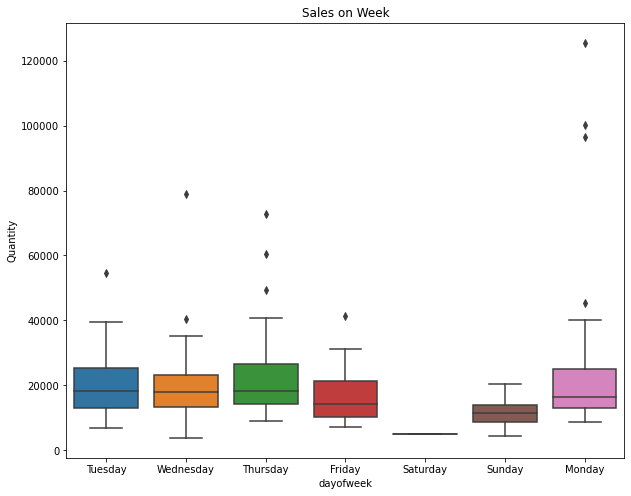

                                                             Figure 3. 22


In [79]:
week_day_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday',
}
df_temp = New_application_data_2_copy.copy()
df_temp['dayofweek'] = df_temp['dayofweek'].map(lambda index: week_day_map[index])

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data = df_temp, x = 'dayofweek', y = 'Quantity')
ax.set_title('Sales on Week')
plt.show()
print("                                                             Figure 3.",count3)
count3=count3+1

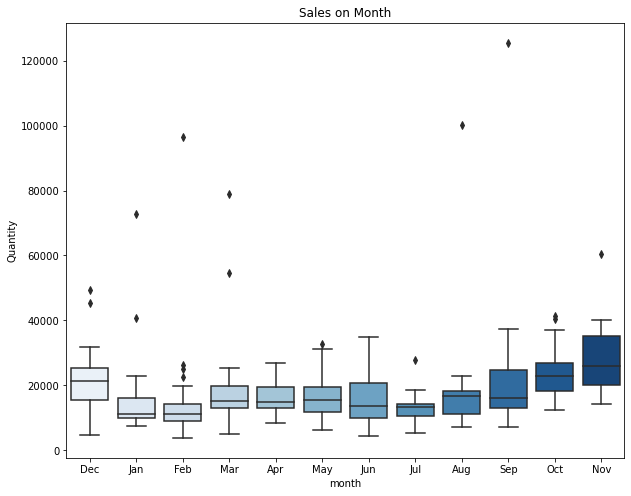

                                                             Figure 3. 23


In [80]:
month_map = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec',
}
df_temp = New_application_data_2_copy.copy()
df_temp['month'] = df_temp['month'].map(lambda index: month_map[index])

fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data = df_temp, x = 'month', y = 'Quantity', palette = 'Blues')
ax.set_title('Sales on Month')
plt.show()
print("                                                             Figure 3.",count3)
count3=count3+1

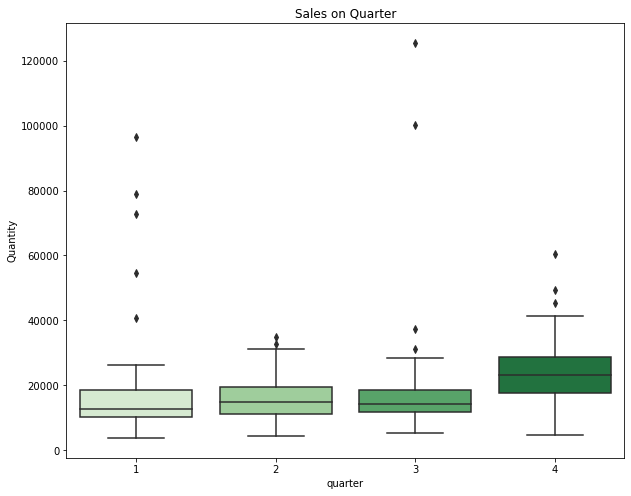

                                                           Figure 3. 24


In [81]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data = df_temp, x = 'quarter', y = 'Quantity', palette = 'Greens')
ax.set_title('Sales on Quarter')
plt.show()
print("                                                           Figure 3.",count3)
count3=count3+1

Mean Squared Error: 0.005934508470260198
RMSE: 0.07703576098319662


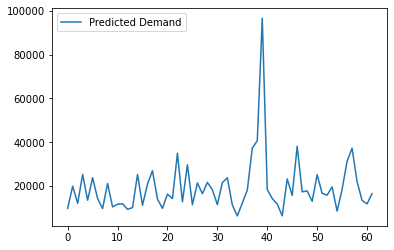

                                    Figure 3. 25


In [82]:
# Rename the columns to 'ds', 'y' and 'price'
df = New_application_data_copy6.rename(columns={'InvoiceDate': 'ds', 'Quantity': 'y', 'Price': 'price'})

# Aggregate the data by day and calculate the total sales for each day
df['ds'] = pd.to_datetime(df['ds']).dt.date
daily_sales = df.groupby('ds').sum()

# Add a new column for the average price per unit sold
daily_sales['avg_price'] = daily_sales['price'] / daily_sales['y']

# Split the data into training and test sets
X = daily_sales[['y', 'avg_price']]
y = daily_sales['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Fit an SVR model to the training data
model = SVR(kernel = 'linear')
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error of the predictions
mse_1 = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse_1)
rmse_1 = np.sqrt(mse_1)
print("RMSE:", rmse_1)

plt.plot(y_pred, label='Predicted Demand')
plt.legend()
plt.show()
print("                                    Figure 3.",count3)
count3=count3+1


RMSE: 0.94


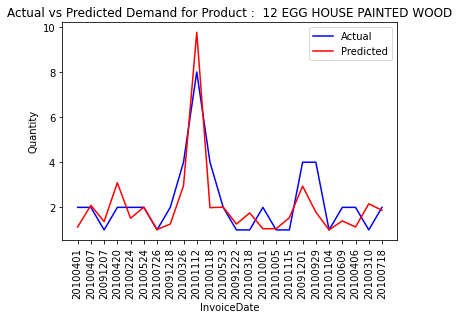

RMSE: 2.29


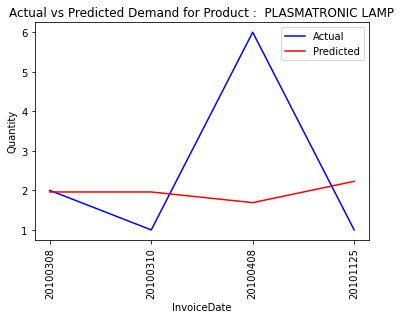

RMSE: 0.28


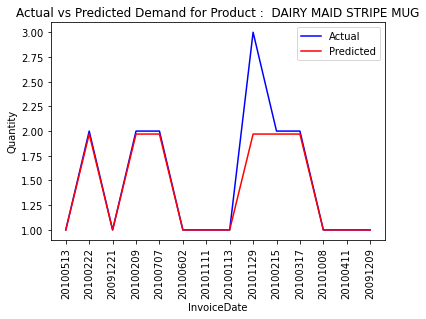

RMSE: 0.26


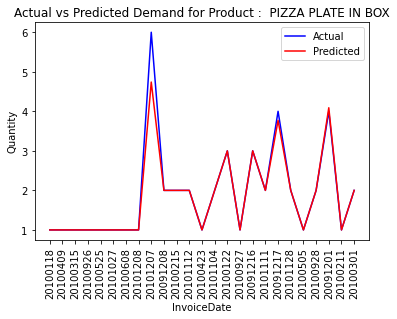

RMSE: 0.26


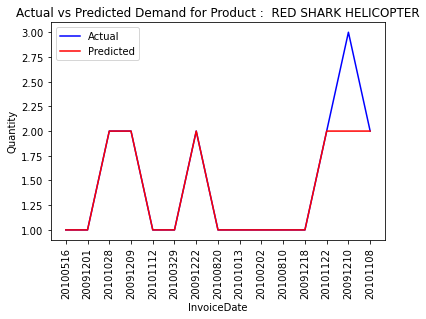

                                Figure 3.10


In [83]:

# Filter the data for a single product
New_application_data_copy6 = New_application_data_copy6.dropna()

product_list = ["12 EGG HOUSE PAINTED WOOD","PLASMATRONIC LAMP"]
product_list1 = ["DAIRY MAID STRIPE MUG","PIZZA PLATE IN BOX","RED SHARK HELICOPTER"]
product_list = product_list + product_list1
for product_id in product_list:
    product_data = New_application_data_copy6[New_application_data_copy6['Description'] == product_id]
    product_data = product_data[['InvoiceDate', 'Price','Quantity']]
    product_data['InvoiceDate'] = pd.to_datetime(product_data['InvoiceDate']).dt.date
    if product_id in product_list1:
        product_data = product_data.groupby(['InvoiceDate']).count().reset_index()

    # Convert the 'Date' column to datetime format
    product_data['InvoiceDate'] = pd.to_datetime(product_data.InvoiceDate, format='%Y-%m-%d')
    product_data.sort_values(by = ['InvoiceDate'], inplace=True)
    product_data['InvoiceDate'] = product_data['InvoiceDate'].dt.strftime('%Y%m%d')

    # Split the data into training and testing sets
    X = product_data[['InvoiceDate','Price']]
    y = product_data['Quantity']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a random forest regressor model and fit it to the training data
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Predict the demand for the testing set
    y_pred = rf.predict(X_test)

    # Calculate the root mean squared error (RMSE) of the predictions
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f'RMSE: {rmse:.2f}')

    # Create a plot of the predicted demand
    fig, ax = plt.subplots()
    ax.plot(X_test['InvoiceDate'], y_test, label='Actual', color='blue')
    ax.plot(X_test['InvoiceDate'], y_pred, label='Predicted', color='red')
    ax.set_xlabel('InvoiceDate')
    ax.set_ylabel('Quantity')
    plt.title(f'Actual vs Predicted Demand for Product :  {product_id}')
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()
    product_data.loc[:] = None
    X_train.loc[:] = None
    X_test.loc[:] = None
    y_train.loc[:] = None
    y_test.loc[:] = None
    X.loc[:] = None
    y.loc[:] = None

print("                                Figure 3.10")

# Feature 4 : PRODUCT COMPATIBILITY

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


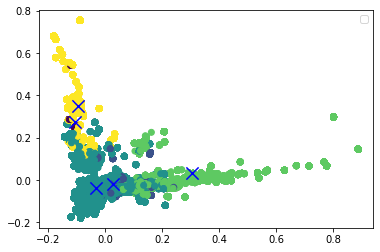

                           Figure 4.1


In [84]:

New_application_data_9 = New_application_data.copy(deep = False)
New_application_data_9 = New_application_data_9.head(100000)
vec = TfidfVectorizer(stop_words = "english")
vec.fit(New_application_data_9.Description.values)
features = vec.transform(New_application_data_9.Description.values)


cls = MiniBatchKMeans(n_clusters=5, random_state = 42)
cls.fit(features)

# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not support prediction on new dataset).
labels = cls.labels_
labels_unique = set(labels)
colors = sns.color_palette('husl', n_colors = len(labels_unique))

# reduce the features to 2D
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(features.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

#plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features), label = labels_unique)
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')
plt.legend()
plt.show()
print("                           Figure 4.1")


In [127]:
from IPython.display import display, HTML
# Preprocess the text data
New_application_data = New_application_data.dropna()
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(New_application_data['Description'])

# Cluster the items
num_clusters = 20
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)

# Add the cluster labels to the dataframe
clusters = km.labels_.tolist()
New_application_data['cluster'] = clusters
print("                 Figure 4.2")
# Print the items in each cluster
for i in range(num_clusters):
    print("Cluster ", i)
    print("----------------------------------------------")
    display(New_application_data[New_application_data['cluster'] == i]['Description'].head(5))
    print("----------------------------------------------")
    


                 Figure 4.2
Cluster  0
----------------------------------------------


109          AIRLINE LOUNGE,METAL SIGN
117    YOU'RE CONFUSING ME METAL SIGN 
118         COOK WITH WINE METAL SIGN 
119        GIN + TONIC DIET METAL SIGN
261    HAND OVER THE CHOCOLATE   SIGN 
Name: Description, dtype: object

----------------------------------------------
Cluster  1
----------------------------------------------


35                  SPACEBOY LUNCH BOX 
37             CIRCUS PARADE LUNCH BOX 
38      CHARLOTTE BAG DOLLY GIRL DESIGN
94    STRAWBERRY LUNCH BOX WITH CUTLERY
95    LUNCH BOX WITH CUTLERY RETROSPOT 
Name: Description, dtype: object

----------------------------------------------
Cluster  2
----------------------------------------------


1                    WHITE METAL LANTERN
4         RED WOOLLY HOTTIE WHITE HEART.
50                   WHITE METAL LANTERN
57    WOOD 2 DRAWER CABINET WHITE FINISH
58     WOOD S/3 CABINET ANT WHITE FINISH
Name: Description, dtype: object

----------------------------------------------
Cluster  3
----------------------------------------------


1209                GLASS  BEURRE DISH
1555    PARTY PIZZA DISH BLUE POLKADOT
1959                GLASS  BEURRE DISH
2571                GLASS  BEURRE DISH
2830          WHITE BROCANTE SOAP DISH
Name: Description, dtype: object

----------------------------------------------
Cluster  4
----------------------------------------------


260      CLOTHES PEGS RETROSPOT PACK 24 
300    PACK OF 12 RED RETROSPOT TISSUES 
437          12 PENCILS TALL TUBE SKULLS
442         PACK 3 BOXES BIRD PANNETONE 
475     PACK 3 BOXES CHRISTMAS PANNETONE
Name: Description, dtype: object

----------------------------------------------
Cluster  5
----------------------------------------------


46     PAPER CHAIN KIT 50'S CHRISTMAS 
122    PAPER CHAIN KIT 50'S CHRISTMAS 
123          PAPER CHAIN KIT RETROSPOT
172      TRADITIONAL CHRISTMAS RIBBONS
197       CHRISTMAS LIGHTS 10 REINDEER
Name: Description, dtype: object

----------------------------------------------
Cluster  6
----------------------------------------------


0     WHITE HANGING HEART T-LIGHT HOLDER
6      GLASS STAR FROSTED T-LIGHT HOLDER
39         RED TOADSTOOL LED NIGHT LIGHT
49    WHITE HANGING HEART T-LIGHT HOLDER
64     GLASS STAR FROSTED T-LIGHT HOLDER
Name: Description, dtype: object

----------------------------------------------
Cluster  7
----------------------------------------------


124          SMALL HEART FLOWERS HOOK 
159    NATURAL SLATE HEART CHALKBOARD 
160              HEART OF WICKER SMALL
161              HEART OF WICKER LARGE
195              HEART OF WICKER SMALL
Name: Description, dtype: object

----------------------------------------------
Cluster  8
----------------------------------------------


2     CREAM CUPID HEARTS COAT HANGER
7             HAND WARMER UNION JACK
8          HAND WARMER RED POLKA DOT
10       RED COAT RACK PARIS FASHION
11    YELLOW COAT RACK PARIS FASHION
Name: Description, dtype: object

----------------------------------------------
Cluster  9
----------------------------------------------


86             JUMBO BAG PINK POLKADOT
88     JUMBO BAG CHARLIE AND LOLA TOYS
89            STRAWBERRY CHARLOTTE BAG
103             JUMBO STORAGE BAG SUKI
104     JUMBO BAG PINK VINTAGE PAISLEY
Name: Description, dtype: object

----------------------------------------------
Cluster  10
----------------------------------------------


33       SET/2 RED RETROSPOT TEA TOWELS 
90     RED 3 PIECE RETROSPOT CUTLERY SET
93               LUNCH BAG RED RETROSPOT
130             RETROSPOT LARGE MILK JUG
146             RECYCLING BAG RETROSPOT 
Name: Description, dtype: object

----------------------------------------------
Cluster  11
----------------------------------------------


106       RETROSPOT TEA SET CERAMIC 11 PC 
110     WHITE SPOT RED CERAMIC DRAWER KNOB
111      RED DRAWER KNOB ACRYLIC EDWARDIAN
112    CLEAR DRAWER KNOB ACRYLIC EDWARDIAN
129         CERAMIC CHERRY CAKE MONEY BANK
Name: Description, dtype: object

----------------------------------------------
Cluster  12
----------------------------------------------


13       ASSORTED COLOUR BIRD ORNAMENT
17             IVORY KNITTED MUG COSY 
22            LOVE BUILDING BLOCK WORD
36             LUNCH BOX I LOVE LONDON
40     SET 2 TEA TOWELS I LOVE LONDON 
Name: Description, dtype: object

----------------------------------------------
Cluster  13
----------------------------------------------


96        PACK OF 72 RETROSPOT CAKE CASES
97         PACK OF 60 DINOSAUR CAKE CASES
98     PACK OF 60 PINK PAISLEY CAKE CASES
99            60 TEATIME FAIRY CAKE CASES
266    PACK OF 60 PINK PAISLEY CAKE CASES
Name: Description, dtype: object

----------------------------------------------
Cluster  14
----------------------------------------------


3      KNITTED UNION FLAG HOT WATER BOTTLE
61     KNITTED UNION FLAG HOT WATER BOTTLE
78     KNITTED UNION FLAG HOT WATER BOTTLE
82       HOT WATER BOTTLE TEA AND SYMPATHY
229       RETROSPOT HEART HOT WATER BOTTLE
Name: Description, dtype: object

----------------------------------------------
Cluster  15
----------------------------------------------


24                   DOORMAT NEW ENGLAND
87        JUMBO  BAG BAROQUE BLACK WHITE
132              EDWARDIAN PARASOL BLACK
155    WOOD BLACK BOARD ANT WHITE FINISH
176       JUMBO  BAG BAROQUE BLACK WHITE
Name: Description, dtype: object

----------------------------------------------
Cluster  16
----------------------------------------------


5            SET 7 BABUSHKA NESTING BOXES
9                JAM MAKING SET WITH JARS
34    ROUND SNACK BOXES SET OF4 WOODLAND 
44                MINI PAINT SET VINTAGE 
63           SET 7 BABUSHKA NESTING BOXES
Name: Description, dtype: object

----------------------------------------------
Cluster  17
----------------------------------------------


21               HOME BUILDING BLOCK WORD
140    DOORMAT FANCY FONT HOME SWEET HOME
183              HOME BUILDING BLOCK WORD
185    DOORMAT FANCY FONT HOME SWEET HOME
186               HOME SMALL WOOD LETTERS
Name: Description, dtype: object

----------------------------------------------
Cluster  18
----------------------------------------------


151     3 TIER CAKE TIN GREEN AND CREAM
152       3 TIER CAKE TIN RED AND CREAM
328             LAVENDER INCENSE IN TIN
472              PLASTERS IN TIN SKULLS
670    PLASTERS IN TIN VINTAGE PAISLEY 
Name: Description, dtype: object

----------------------------------------------
Cluster  19
----------------------------------------------


26          ALARM CLOCK BAKELIKE PINK
121    PINK BREAKFAST CUP AND SAUCER 
147            TOY TIDY PINK POLKADOT
179    LIGHT GARLAND BUTTERFILES PINK
214             JAM JAR WITH PINK LID
Name: Description, dtype: object

----------------------------------------------
